## Question
Build an ANN model for Drug classification. This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to develop a model that can accurately predict the class or category of a given drug based on its features.

Task 1: Read the dataset and do data pre-processing

Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

Task 3: Test the model with random data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.shape

(200, 6)

In [7]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [8]:
df.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

<AxesSubplot:xlabel='Drug', ylabel='count'>

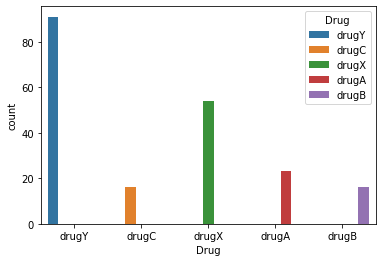

In [9]:
sns.countplot(x='Drug',data=df,hue='Drug')

In [10]:
X=df.iloc[:,0:5]
Y=df['Drug']

In [11]:
Y_class=len(np.unique(Y))
print(Y_class)

5


In [12]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [13]:
Y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

X=pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)
Le=LabelEncoder()
Y=Le.fit_transform(Y)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [16]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [17]:
from tensorflow import keras

Y_train=keras.utils.to_categorical(Y_train)
Y_test=keras.utils.to_categorical(Y_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(48,input_dim=6, activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(Y_class,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(X_train,Y_train,epochs=48,batch_size=6)

Epoch 1/48
24/24 [==============================] - 1s 3ms/step - loss: 1.5644 - accuracy: 0.4214
Epoch 2/48
24/24 [==============================] - 0s 3ms/step - loss: 1.4355 - accuracy: 0.5714
Epoch 3/48
24/24 [==============================] - 0s 2ms/step - loss: 1.2584 - accuracy: 0.6143
Epoch 4/48
24/24 [==============================] - 0s 3ms/step - loss: 1.0320 - accuracy: 0.6429
Epoch 5/48
24/24 [==============================] - 0s 3ms/step - loss: 0.8092 - accuracy: 0.7571
Epoch 6/48
24/24 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.8000
Epoch 7/48
24/24 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.8143
Epoch 8/48
24/24 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.8357
Epoch 9/48
24/24 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.8500
Epoch 10/48
24/24 [==============================] - 0s 5ms/step - loss: 0.3294 - accuracy: 0.8571
Epoch 11/48
24/24 [

In [22]:
test_loss,test_acc=model.evaluate(X_test,Y_test)
print('Test accuracy:',test_acc*100)

2/2 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 0.9167
Test accuracy: 91.66666865348816


In [23]:
pred=model.predict(X_test[:1])

1/1 [==============================] - 0s 126ms/step


In [24]:
pred

array([[9.9436635e-05, 2.0207297e-06, 9.0211608e-05, 2.0327382e-08,
        9.9980837e-01]], dtype=float32)